In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from openai import OpenAI
from dotenv import load_dotenv
import os
import random
import numpy as np
import regex as re
import pandas as pd
import random
from scipy import stats
import tiktoken

load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_KEY')

/homes/ngetach/miniconda/envs/project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
encoding = tiktoken.encoding_for_model("gpt-4")

In [ ]:
df = pd.read_csv('results_tests.csv')
df.head()

,Prompt,GPT3.5,GPT4,Label
0,Dylan jumps in hole_3. Dylan writes their name...,NaN,Dylan jumps in hole_3. Dylan writes their name...,hole_4
1,Alice jumps in hole_3. Alice sits down to rest...,NaN,Dylan jumps in hole_3. Dylan writes their name...,hole_1
2,Alice jumps in hole_2. Alice writes their name...,NaN,Dylan jumps in hole_3. Dylan writes their name...,hole_2
3,Alice jumps in hole_4. Alice writes their name...,NaN,Dylan jumps in hole_3. Dylan writes their name...,hole_3
4,Josh jumps in hole_1. Josh writes their name o...,NaN,Dylan jumps in hole_3. Dylan writes their name...,hole_1


In [5]:
print(df['GPT4'])

0                               Dylan jumps in hole_3. Dylan writes their name on the floor. Dylan jumps out to the field. Dylan picks up a stone. Alice jumps in hole_3. Josh jumps in hole_1. Josh picks up a stone. Alice jumps out to the field. Alice picks up a stone. Bob jumps in hole_2. Joe jumps in hole_4. Joe draws a triangle on the wall. Josh jumps out to the field. Josh sits down to rest. Alice jumps in hole_2. Alice sits down to rest. Alice jumps out to the field. Dylan jumps in hole_3. Dylan sits down to rest. Bob jumps out to the field. Bob jumps in hole_1. Bob draws a triangle on the wall. Josh jumps in hole_4. Josh writes their name on the floor. Dylan jumps out to the field. Dylan picks up a stone. Alice jumps in hole_3. Alice writes their name on the floor. Alice jumps out to the field. Alice sits down to rest. Dylan jumps in hole_2. Josh jumps out to the field. Bob jumps out to the field. Bob jumps in hole_3. Josh jumps in hole_1. Josh draws a triangle on the wall. Bob ju

In [41]:
lengths = df['GPT3.5'].apply(lambda x: len(encoding.encode(x)))

In [42]:
lengths.describe()

count       50.000000
mean     10210.680000
std         93.115123
min      10043.000000
25%      10135.750000
50%      10208.000000
75%      10274.000000
max      10373.000000
Name: GPT3.5, dtype: float64

<Axes: >

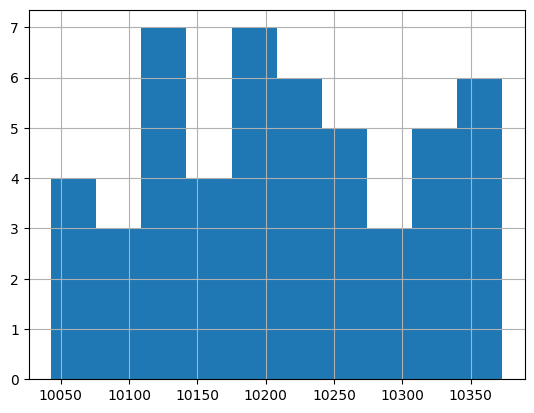

In [44]:
lengths.hist()

In [38]:
df2 = pd.read_csv('results_test_3_synthcot_50.csv')
df2.head()

,Prompt,GPT3.5,GPT4,Label
0,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,hole_4
1,Bob jumps in hole_2. Alice jumps in hole_3. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,hole_3
2,Dylan jumps in hole_4. Joe jumps in hole_2. Al...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,hole_4
3,Josh jumps in hole_2. Josh jumps out to the fi...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,hole_4
4,Alice jumps in hole_4. Dylan jumps in hole_2. ...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,Dylan jumps in hole_3. Joe jumps in hole_2. Dy...,hole_4


In [39]:
lengths2 = df2['GPT3.5'].apply(lambda x: len(encoding.encode(x)))
lengths2.describe()

count      50.000000
mean     5996.680000
std        93.115123
min      5829.000000
25%      5921.750000
50%      5994.000000
75%      6060.000000
max      6159.000000
Name: GPT3.5, dtype: float64

<Axes: >

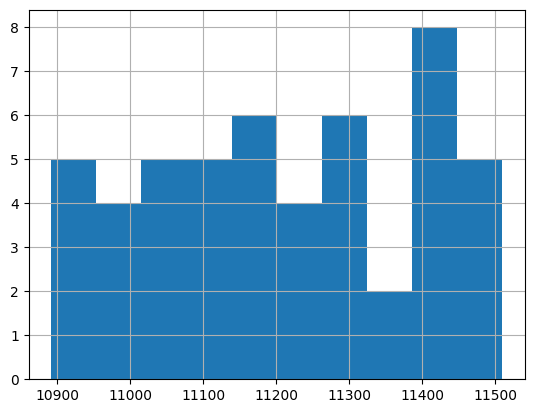

In [31]:
lengths.hist()

In [9]:
df.apply(lambda x: int(x['Label'] in x['GPT4']), axis=1 ).sum()/len(df)

0.8

In [15]:
mismatched = df[~df.apply(lambda row: str(row['Label']) in str(row['GPT3.5']), axis=1)]
mismatched.iloc[0]["GPT3.5"], mismatched.iloc[0]["Label"], mismatched.iloc[0]["Prompt"]

('First, both Bob and Josh are in the field. Then Josh jumps in hole_3. Then, Josh jumps out to the field. The last place Bob saw Josh was when they were both in field. Therefore, Bob thinks Josh is in the field.',
 'hole_1',
 'Bob jumps in hole_2. Alice jumps in hole_3. Dylan jumps in hole_1. Joe jumps in hole_1. Bob jumps out to the field. Dylan jumps out to the field. Bob jumps in hole_4. Dylan jumps in hole_1. Josh jumps in hole_3. Dylan jumps out to the field. Alice jumps out to the field. Bob jumps out to the field. Bob jumps in hole_3. Josh jumps out to the field. Bob jumps out to the field. Alice jumps in hole_2. Bob jumps in hole_4. Joe jumps out to the field. Dylan jumps in hole_1. Bob jumps out to the field. Alice jumps out to the field. Joe jumps in hole_1. Bob jumps in hole_1. Bob jumps out to the field. Bob jumps in hole_1. Dylan jumps out to the field. Alice jumps in hole_3. Dylan jumps in hole_2. Bob jumps out to the field. Joe jumps out to the field. Dylan jumps out to

(<Axes: >, <Axes: >)

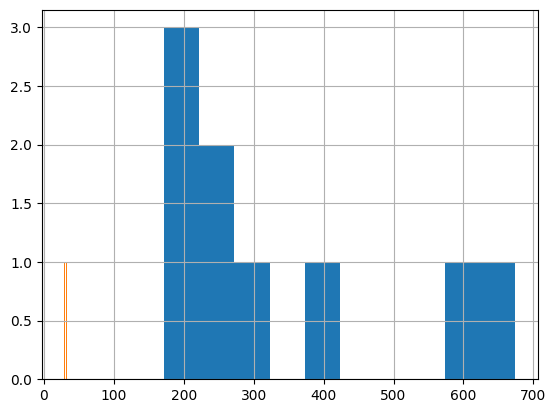

In [35]:
mismatched['GPT3.5'].apply(lambda x: len(x)).hist(), mismatched['GPT4'].apply(lambda x: len(x)).hist()

In [36]:
for index, row in df.iterrows():
    if row['Label'] not in row['GPT4']:
            print(f"4 column value: {row['GPT4']}, Label column value: {row['Label']}")


4 column value: Josh thinks Bob is in the field., Label column value: hole_1
4 column value: Joe thinks Alice is in the field., Label column value: hole_2
4 column value: Bob thinks Joe is in the field., Label column value: hole_4
4 column value: Bob thinks Dylan is in hole_2., Label column value: field
4 column value: Alice thinks Josh is in the field., Label column value: hole_4
4 column value: Dylan thinks Josh is in the field., Label column value: hole_3
4 column value: Alice thinks Joe is in the field., Label column value: hole_3
4 column value: Dylan thinks Josh is in the field., Label column value: hole_1
4 column value: Bob thinks Josh is in the field., Label column value: hole_3
4 column value: Dylan thinks Alice is in the field., Label column value: hole_2
4 column value: Dylan thinks Alice is in the field., Label column value: hole_3
4 column value: Dylan thinks Joe is in the field., Label column value: hole_1
4 column value: Joe thinks Alice is in hole_4., Label column valu